<a href="https://colab.research.google.com/github/Eldave93/Seizure-Detection-Tutorials/blob/master/03.%20Supervised%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IVP Project group 20

This notebook will focus on "supervised" classifiers, which can be run on the data to detect signal differences and separate signals into different groups, and methods to prepare the feature data with sklearn and imblearn before it is put into a classifier. 

## Background: Machine Learning

"*Machine learning is the science of programming computers so they can learn from data*"<sup>1</sup>. 

Machine learning is great for problems that would require a lot of tuning by hand or a lot of rules, changing environments, and large data. This is because ML techiques are flexible and are not 'hard coded' so can adapt as well as able to discover patterns un-noticed previously<sup>1</sup>. Different types of machine learning systems exist based on:
- whether they have human supervision 
- whether they can learn incrementally
- whether they compare new data to known data or detect patterns and build a predictive model

At the start of this series of tutorials we will focus on Supervised learning, where a model is trained on a set of data so that it learns how to classify it using a set of labels. This model can then be used to predict the classification of a new set of data given a set of features. We then look at unsupervised learning, primarily in the context of dimensionality reduction, where the model attempts to group data not based on class labels but on their similarity or differences to other data; typically in the form of a clustering algorithm<sup>1</sup>.

There are a number of challenges to overcome when developing a machine learning system that we will come back to during the series (taken from<sup>1</sup>):
> - Insufficient Quantity of Training Data
>    - It has been shown<sup>2,3</sup> that even the most basic of machine learning pipelines can perfrom well on a complex task if given the right amount of data 
> - Nonrepresentative Training Data
>    - For a model to generalise to new data well, the data it was trained on has to be representative. This can be effected by the quantity of data, due to small samples having larger chance of noise, and flawed sampling methodology, influenced by sampling bias.
> - Poor Data Quality
>    - As is often the case with real world data, it is filled with errors, outliers and noise which will impact the ability of the system to detect patterns. Decisions then need to be made how to address these, for example do you ignore or fill in missing values.
> - Irrelevant Features
>    - Feature engineering is a critical part of a machine learning project as it ensures relevent features are used to train a model on. As well as creating the features, they can be futher selected for their usefulness, or extracted by combing features to create more useful ones.
> - Overfitting the Training Data
>    - Models can overgeneralize from the data it was trained on, sometimes focusing on patterns that only occour in thie training data. The model is too complex for the data and needs to be simplified, often by chaging its hyperparmeters.
> - Underfitting the Training Data
>    - Occours when the model is too simple and requires a more complex model, better features, or reduced model constraints.


**TODO**
- supplement this with introduction material from other machine learning books & my thesis writing
- Follow up the challenges in the notebooks and how we are addressing them. For example moving away from some of the smaller datasets, how they remove artefacts ect.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

2. Banko, M., & Brill, E. (2001, July). Scaling to very very large corpora for natural language disambiguation. In Proceedings of the 39th annual meeting on association for computational linguistics (pp. 26-33). Association for Computational Linguistics.

3. Halevy, A., Norvig, P., & Pereira, F. (2009). The unreasonable effectiveness of data. IEEE Intelligent Systems, 24(2), 8-12.

## Background: Supervised Classification

Classifiers separate pre-determined classes under the assumption that the presented data belongs to one of the classes. A classifier can simply be imposing a threshold on features, or employing more complex methods such as using machine learning algorithms, which require training and application to unseen data<sup>1</sup>.

If a machine learning algorithm is chosen to classify data then selecting features is only the first step and is often followed by choosing a performance metric to optimize, choosing one or more classifier and optimization algorithms, evaluating model performance, and then tuning the algorithm<sup>2</sup>.

Machine learning algorithms can be categorised by the level of ‘supervision’ for the learning. Supervised learning is where data is learned to be mapped onto labels using training examples and therefore can also be known as a classification task. ‘Supervised’ refers to where the desired output labels are already known<sup>2</sup>. Classification, a subclass of supervised learning, aims to predict the class of labels of new data instances based on previous observations. Binary classification is where an algorithm learns rules to distinguish between two cases, with most machine learning algorithms able to be extended to multi-class classification using techniques such as the One-versus-Rest or One-versus-One methods<sup>2</sup>. As well as categorical labels, continuous outcomes can be predicted using algorithms such as regression analysis. 

There are two broad types of classification algorithm; generative and discriminative algorithms. Generative algorithms, such as Naive Bayes’ models, hidden Markov models, and Gaussian mixture models, learn the joint probability of data instances and their labels and subsequently apply Bayes’ theorem to calculate the posterior probability and predict new data instances<sup>3,4</sup>; Bayes’ theorem being a method of model selection by calculating the likelihood of a model given the data and expected distribution of the probabilities (prior). Discriminative algorithms, such as logistic regression, support vector machines, and decision trees, model the boundaries separating labels<sup>5</sup>. Generally discriminative algorithms outperform generative algorithms<sup>6</sup>, but generative algorithms can identify new labels. 

---
1. Varsavsky, A., Mareels, I., & Cook, M. (2016). Epileptic seizures and the EEG: measurement, models, detection and prediction. CRC Press.
2. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
3. Mohr, D. C., Zhang, M., & Schueller, S. M. (2017). Personal sensing: understanding mental health using ubiquitous sensors and machine learning. Annual review of clinical psychology, 13, 23-47.
4. Ng, A. Y., & Jordan, M. I. (2002). On discriminative vs. generative classifiers: A comparison of logistic regression and naive bayes. In Advances in neural information processing systems (pp. 841-848).
5. Mohr, D. C., Zhang, M., & Schueller, S. M. (2017). Personal sensing: understanding mental health using ubiquitous sensors and machine learning. Annual review of clinical psychology, 13, 23-47.
6. Bernardo, J. M., Bayarri, M. J., Berger, J. O., Dawid, A. P., Heckerman, D., Smith, A. F. M., & West, M. (2007). Generative or discriminative? getting the best of both worlds. Bayesian statistics, 8(3), 3-24.

In [ ]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes

RANDOM_STATE = 0

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Data Preparation

## Load Data

Lets start by loading in a feature dataframe made in the notebook **Extra 01. Assemble Feature DataFrames**, based on features you learnt about in the previous notebook.

The easiest way to get started is to use the code below to download it from my google drive shared link onto the colab disk. However you could get it set up a number of other ways such as...

- ...run the first part of the **Extra 01. Assemble Feature DataFrames** notebook.
- ... follow the drive link and save the file locally onto your computer, then go into the left tab, Files, and upload the data. 
- ...save it to Google Drive, then you can mount the drive and point the FILE_PATH to where you saved it.

In [ ]:
import gdown
FILE_PATH = 'Epil_features.json.gzip'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=143dJfY1_U-p8elbvSzwe0TTHGcDo3PYv', 
                './'+FILE_PATH, quiet=False)

Now lets get the data as a pandas dataframe and have a quick reminder of its structure.

This dataset has only one signal that was divided into multipule datasets lasting 23.6 seconds each. Each dataset was associated with a class and had features extracted from it. These briefly were:

**Welch**

The Welch method is a spectral density estimation method that calculates a periodogram for windowed sections of data using a Fourier Transform. Overlapping segments are windowed with a discrete Fourier tranform applied to calculate the periodogram which is then squared and averaged to get a power measure.
- *power_delta*: Average power between 0.1hz and 4hz 
- *power_theta*: Average power between 4hz and 8hz 
- *power_alpha*: Average power between 8hz and 12hz 
- *power_beta*: Average power between 12hz and 30hz 
- *power_gamma*: Average power between 30hz and 70hz 

**Discrete Wavelet Transform**

Several oscillatory kernel-based wavelets are stretched and moved to different positions in time across a signal, dividing the data into different frequency components which are each analysed in respect to their scale.
- *LSWT*: The log-sum energy of the subband coefficients
- *mean*: Average power of the wavelet coefficients in each sub-band
- *mean_abs*: Mean of the absolute values of the coefficients in each sub-band
- *std*: Standard deviation of the coefficients in each sub-band
- *Ratio*: Ratio of the absolute mean values of adjacent sub-bands

If you want more specific detail on these features then I recommend you look at the tutorial associated with the feature extraction.

In [3]:
import numpy as np
import pickle           # saving python objects
import pandas as pd     # dataframes

# load features dataframe
feature_df = pd.read_json(FILE_PATH, orient='index', compression = 'gzip')

# display examples of the data
display(feature_df.info())
display(feature_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 99
Data columns (total 39 columns):
CZ|12_30Hz              500 non-null float64
CZ|2_4Hz                500 non-null float64
CZ|30_70Hz              500 non-null float64
CZ|4_8Hz                500 non-null float64
CZ|8_12Hz               500 non-null float64
CZ|D1_LSWT              500 non-null float64
CZ|D1_mean              500 non-null float64
CZ|D1_mean_abs          500 non-null float64
CZ|D1_ratio             500 non-null float64
CZ|D1_std               500 non-null float64
CZ|D2_LSWT              500 non-null float64
CZ|D2_mean              500 non-null float64
CZ|D2_mean_abs          500 non-null float64
CZ|D2_ratio             500 non-null float64
CZ|D2_std               500 non-null float64
CZ|D3_LSWT              500 non-null float64
CZ|D3_mean              500 non-null float64
CZ|D3_mean_abs          500 non-null float64
CZ|D3_ratio             500 non-null float64
CZ|D3_std               500 non-null floa

None

CZ|12_30Hz     CZ|2_4Hz  ...  file_id                         location
0      2.467909    77.429564  ...     F001  intracranial epileptogenic zone
1     29.713494  1060.585071  ...     F002  intracranial epileptogenic zone
10     4.786972   760.135786  ...     F011  intracranial epileptogenic zone
100    4.395178   413.443671  ...     N001         intracranial hippocampus
101    7.851587   721.653790  ...     N002         intracranial hippocampus

[5 rows x 39 columns]

## Channel Selection

As can be seen, there are 3 types of electrode placement locations in this data

In [4]:
feature_df['location'].unique()

array(['intracranial epileptogenic zone', 'intracranial hippocampus',
       'surface'], dtype=object)

For now lets just select data that has been collected intracranially

In [5]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
feature_reduced['location'].unique()

array(['intracranial epileptogenic zone', 'intracranial hippocampus'],
      dtype=object)

## Splitting Data

We need to split the data up into an array containing the feature data and an array of the class labels.

However before diving in, lets first take a moment to reflect on scikit-learn's design principles<sup>1</sup>, as laid out by Géron (2017)<sup>2</sup>, so we can get an understanding as to how to use scikit-learn's API:

> **Consistency**
>
> - *Estimators*: Objects that can estimate parameters based on a dataset. Estimation is performed by the *fit()* method that takes a dataset (or two for supervised learning), with other parameters being hyperparameters set via an instance variable.
> - *Transformers*: Some estimators (e.g. LabelEncoder) can transform the dataset using a *transform()* method to return the transformed dataset; with a convinient and sometimes optimised *fit_transform()* method to do both.
> - *Predictors*: Some estimators can make predictions using a *predict()* method, which can be measured for quality using the *score()* method.
>
> **Inspection**
> - All hyperparameters are available by instance variables (e.g. LogisticRegressionObject.C) and all learned parameters accessible with underscore instance variables (e.g. LogisticRegressionObject.intercept_)
>
> **Nonproliferation of classes**
> - Datasets are NumPy arrays or SciPy sparse matrices with hyperparameters Python strings or numbers.
>
> **Composition**
> - Bulding blocks can be re-used as much as possible; for example the use of *Pipeline* tostring together transformers and an estimator
>
> **Sensible defaults**
> - Most parameters have sensible defaults to get a baseline system working quickly

---

1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. Buitinck, L., Louppe, G., Blondel, M., Pedregosa, F., Mueller, A., Grisel, O., ... & Layton, R. (2013). API design for machine learning software: experiences from the scikit-learn project. arXiv preprint arXiv:1309.0238.

In [6]:
import sklearn
sklearn.__version__

'0.22.1'

### Datax

Getting the feature array is pretty easy. All we need do is remove the other columns I made referring to the class, file_id and location of the electrodes as these will not be used as features of the signals.

Scikit-learn accepts numpy arrays so we need to change our pandas dataframe to an array. This is simple enough as we just need to use `.values`

In [7]:
feature_df_drop = feature_df.drop(['class', 'file_id', 'location'], axis='columns')
data_x = feature_df_drop.values

data_x

array([[2.46790861e+00, 7.74295636e+01, 4.62171875e-01, ...,
        1.27205812e+00, 9.49549453e+01, 1.38219288e-01],
       [2.97134939e+01, 1.06058507e+03, 4.07012640e+00, ...,
        1.87894919e+00, 3.99209789e+02, 1.40057310e-01],
       [4.78697164e+00, 7.60135786e+02, 9.28530411e-01, ...,
        1.67143117e+00, 2.98590769e+02, 6.10613516e-02],
       ...,
       [9.59578301e+00, 1.20736982e+03, 1.75785553e+00, ...,
        1.40146551e+00, 3.29618290e+02, 7.72791505e-02],
       [1.70380571e+00, 6.86527289e+01, 3.54295046e-01, ...,
        1.01747310e+00, 7.68086900e+01, 3.60895417e-02],
       [2.69223254e+00, 1.06491512e+02, 4.69575535e-01, ...,
        1.31422238e+00, 1.18630505e+02, 7.85838873e-02]])

### Datay

Getting the class labels ready has a little more to it as you need to make a decision regarding how you encode it. Data class strings are typically encoded into integers, using methods such as one-hot encoding, dummy coding and effect coding.

The most simple method is to use a label encoder, which encodes labels with value between 0 and n_classes-1. However values then become orderable, which should not be permissible for destinct categories<sup>1</sup>. Still this is a common and easy method because it is easy to get sklearn to fit and predict models based on integer encoded data.

Lets have a look at how we could encode the class labels to make a binary decision, seizure (ictal) or no seizure (baseline/inter-ictal).

**NOTE**
- The positive class in scikit-learn is the class that is labeled as class 1 unless specified when creating a scoring metric.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

In [8]:
display(feature_df['class'].value_counts())

baseline    400
seizure     100
Name: class, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

# create condition(group) array
class_series = feature_df['class']

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(class_series)

# get the unique labels
labels = list(class_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(le.transform(labels))):
    print(labels[i] + ': ' + str(code))
    
data_y[:5]

baseline: 0
seizure: 1


array([0, 0, 0, 0, 0])

Another method is to use One-Hot Encoding which represents category labels as a group of bits with each bit representing a category. However this method uses one more bit than really neccissary, leading to a linear dependency (e1 + e2 + ... + ek = 1).

Imagine we wanted to classify the locations of the electrodes, as we have 3 locations, then to ensure class 2, 1, 0 are not given different weights then we should encode them using the LabelBinarizer.

**Note** 
- a one-hot encoding of y labels should use LabelBinarizer instead of the OneHotEncoder as the latter is meant for feature variables NOT classes

In [10]:
feature_df['location'].value_counts()

surface                            200
intracranial epileptogenic zone    200
intracranial hippocampus           100
Name: location, dtype: int64

**Note**
- SciPy sparse matrices are useful for one-hot encoded data as it only stores the location of the nonzero elements so saves on space. These are the default for sklearn.preprocessing.OneHotEncoder and can be used where you want to use categorical data as a feature.

In [11]:
from sklearn.preprocessing import LabelBinarizer

# create condition(group) array
location_series = feature_df['location']

# make a label encoder
lb = LabelBinarizer()
# change the string labels to ints
data_y = lb.fit_transform(location_series)

# get the unique labels
labels = list(location_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(lb.transform(labels))):
    print(labels[i] + ': ' + str(code))
    
data_y[:5]

intracranial epileptogenic zone: [1 0 0]
intracranial hippocampus: [0 1 0]
surface: [0 0 1]


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

Dummy Coding avoids the latter problem with One-Hot Encoding, as it represents features in only k-1 features. The last feature is represented by all 0's and known as the reference category. However this means, unlike one-hot encoding, missing data cannot be represented as all 0's.

There doesnt appear at time of writing a way to do this in sklearn, but we can do it easily in Pandas using the get_dummies function. By default, the get_dummies() does not do dummy encoding, but one-hot encoding, so we need to use drop_first=True (notice from the pandas df there is no intracranial epileptogenic zone as it is now [0,0]).

In [12]:
one_hot_y = pd.get_dummies(location_series.unique())
dummy_y = pd.get_dummies(location_series.unique(), drop_first=True)

print(color.BOLD+color.UNDERLINE+'Onehot'+color.END)
display(one_hot_y.head())
print(color.BOLD+color.UNDERLINE+'Dummy'+color.END)
display(dummy_y.head())

Onehot


intracranial epileptogenic zone  intracranial hippocampus  surface
0                                1                         0        0
1                                0                         1        0
2                                0                         0        1

Dummy


intracranial hippocampus  surface
0                         0        0
1                         1        0
2                         0        1

There are other methods that we won't focus upon but I will briefly mention them.

Firstly there is effect coding, which is similar to dummy coding except the reference category is represented as -1's rather than two 0's. The reason you may want to do this relates to interpretaion of a regression analysis, which we will not touch on in this notebook, however can be read about in Zheng and Casari (2018)<sup>1</sup>.

For large categorical variables, feature hashing can be used. A hash function deterministically maps unbounded integers to a finite range with multiple numbers mapped to the same output (collision). Uniform hashing means roughly the same number of numbers are mapped to each m bins. However the problem is that hashed features are no longer interpretable, but do have major computational benifits for data exploration and viualization in machine learning for large datasets.

Bin counting is another method for large data that uses the conditional probability of a target rather than the category value. It assumes that historical data is availible for the statistics. Other features can be used in additional probability including raw counts and the log-odds ratio. This is in order to convert a large, sparse binary categorical representation into small, dense, real-valued numbers. Rare categories can also be given their own bin, if under a threshold, as these categories likely will not provide enough data to reliably estimate the given target. The problem with bin counting is there is potential for data leakage, although there are methods to prevent this<sup>1</sup>.

---
1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

### Training and Test Data

Data is split into training and test sets that have the same class proportions as the original data. This is because later when we fit out classification model to predict a class in the data, we want to compare predictions to some true labels in a separate group of data (the test set) to give an unbiased performance evaluation of our model before we use it in the real world. Balancing the information loss in the training set and estimation of a models generalization error requires the size of the data to be taken into consideration. As we are witholding data the algorithm could learn from for the test set we don't want to withhold too much information but the smaller the test set, the more inaccurate the estimation of the generalization error<sup>1</sup>.

To split the data we will use the train_test_split function. Note that this function automatically shuffles the data before splitting. We fix a random_state parameter, as we will for a number of later functions, to fix the internal pseudo-random number generator used for shuffling the datasets to ensure our results are reproducible.

Lets start by going back to a simple label encoded y data to encode seizure and non-seizure data and we will remove the surface electrodes.

**NOTE**
- Its sometimes advised you actually split the data before calculating your features to ensure they are separated. However, for the ease of this tutorial we worked out all the features first and are splitting them now

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

In [13]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
# drop the columns which are not feature variables
feature_reduced_drop = feature_reduced.drop(['class', 'file_id', 'location'], axis='columns')
# change to an array
data_x = feature_reduced_drop.values
# change the string labels to ints
data_y = le.fit_transform(feature_reduced['class'])

print(color.BOLD+'Feature DataFrame'+color.END)
display(data_x.shape)
print(color.BOLD+'Target DataFrame'+color.END)
display(data_y.shape)

Feature DataFrame


(300, 36)

Target DataFrame


(300,)

In [14]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.1

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=TEST_SIZE, 
                                                  random_state=RANDOM_STATE)

print(color.BOLD+color.UNDERLINE+'Feature DataFrame'+color.END)
print('Training size: ' + str(X_train.shape))
print('Validation size: ' + str(X_val.shape))
print('Test size: ' + str(X_test.shape))
print(color.BOLD+color.UNDERLINE+'\nTarget DataFrame'+color.END)
print('Training size: ' + str(y_train.shape))
print('Validation size: ' + str(y_val.shape))
print('Test size: ' + str(y_test.shape))

Feature DataFrame
Training size: (243, 36)
Validation size: (27, 36)
Test size: (30, 36)

Target DataFrame
Training size: (243,)
Validation size: (27,)
Test size: (30,)


Lets just check that the proportions of a class membership is in the split data (1st column being class label and 2nd being count)

In [15]:
def get_proportions(data):

    counts = pd.DataFrame(np.unique(data, return_counts=True), index = ['Class_ID', 'Counts']).T
    counts['Percent'] = (counts['Counts']/counts['Counts'].sum()).round(2)*100
    counts = counts.set_index('Class_ID')
    return counts

    
print(color.BOLD+color.UNDERLINE+'Training DataFrame'+color.END)
display(get_proportions(y_train))
print(color.BOLD+color.UNDERLINE+'\nTest DataFrame'+color.END)
display(get_proportions(y_test))

Training DataFrame


Counts  Percent
Class_ID                 
0            164     67.0
1             79     33.0


Test DataFrame


Counts  Percent
Class_ID                 
0             18     60.0
1             12     40.0

We've already come across the scaler in the previous tutorial. It is needed for classifiers with decision thresholds as we will explore in this tutorial.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

## Balancing the Classes

In some domain applications, the data will have a differing number of data in each class. This is particularly the case in seizure detection, where seizures ('Ictal' EEG) happen infrequently comparative to baseline EEG (known as Interictal - the period between seizures). The learning and prediction of machine learning algorithms tend to be affected by imballances; for example the decision function of a linear SVM may favour the majority class<sup>1</sup>. There are a number of methods available to address imbalances in a dataset, with types being broadly categorised into Under-Sampling, Over-Sampling, and a combination of both.

However before getting into the method, first lets look at our data and pick two features to visualise for the re-sampling because as can be seen in the extra section (Plot All Features) there are loads of combinations!

**NOTE**
- this is a pretty quick tour of ballancing methods. For more in-depth explanations make sure to check out: https://github.com/scikit-learn-contrib/imbalanced-learn

---

1. http://contrib.scikit-learn.org/imbalanced-learn/stable/introduction.html

In [17]:
feature_list = list(feature_reduced_drop.columns)
feature_list

['CZ|12_30Hz',
 'CZ|2_4Hz',
 'CZ|30_70Hz',
 'CZ|4_8Hz',
 'CZ|8_12Hz',
 'CZ|D1_LSWT',
 'CZ|D1_mean',
 'CZ|D1_mean_abs',
 'CZ|D1_ratio',
 'CZ|D1_std',
 'CZ|D2_LSWT',
 'CZ|D2_mean',
 'CZ|D2_mean_abs',
 'CZ|D2_ratio',
 'CZ|D2_std',
 'CZ|D3_LSWT',
 'CZ|D3_mean',
 'CZ|D3_mean_abs',
 'CZ|D3_ratio',
 'CZ|D3_std',
 'CZ|D4_LSWT',
 'CZ|D4_mean',
 'CZ|D4_mean_abs',
 'CZ|D4_ratio',
 'CZ|D4_std',
 'CZ|D5_LSWT',
 'CZ|D5_mean',
 'CZ|D5_mean_abs',
 'CZ|D5_ratio',
 'CZ|D5_std',
 'CZ|D6_LSWT',
 'CZ|D6_mean',
 'CZ|D6_mean_abs',
 'CZ|D6_ratio',
 'CZ|D6_std',
 'CZ|Ratio_3_12/2_30Hz']

Now we pick our two options and we'll format a dataframe so they are put in two side by side columns

In [18]:
x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

reduced_array = X_train_scale[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]
reduced_df = pd.DataFrame(reduced_array, columns=[x_axis_label, y_axis_label])

reduced_df.head()

CZ|D1_ratio  CZ|D2_ratio
0     1.352627     0.767942
1    -0.027638    -0.873679
2    -1.351699    -0.195632
3    -1.499258     0.634610
4     0.291659     0.215175

Now we can look at a pairplot

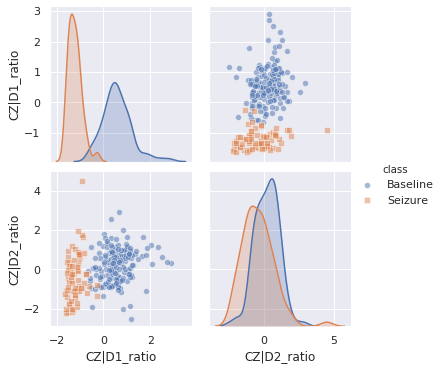

In [19]:
import seaborn as sns; sns.set(color_codes=True)

def plot_pairplot(data_x, data_y):

    data_plot = data_x.copy()
    data_plot['class'] = np.vectorize({0:'Baseline', 1:'Seizure'}.get)(data_y)
    sns.pairplot(data_plot, 
                 hue = 'class', 
                 hue_order = ['Baseline','Seizure'],
                 markers=["o", "s"], 
                 plot_kws=dict(alpha = 0.5))
    plt.show()
    
plot_pairplot(reduced_df, y_train)

### Under-Sampling

**Resample**

A fast way to balance the data is just to randomly select a subset of the data for each class so they have the number of datapoints found in the smallest class.

First lets do this using the scikit-learn library

Before Resample
Counter({0: 164, 1: 79})


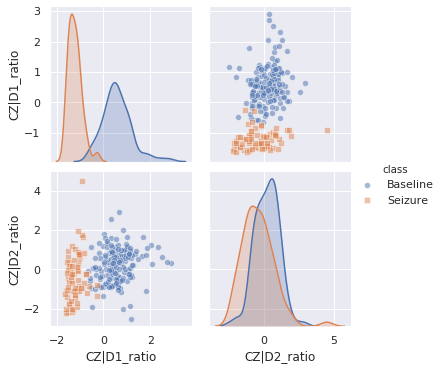

After Resample
Counter({1: 79, 0: 79})


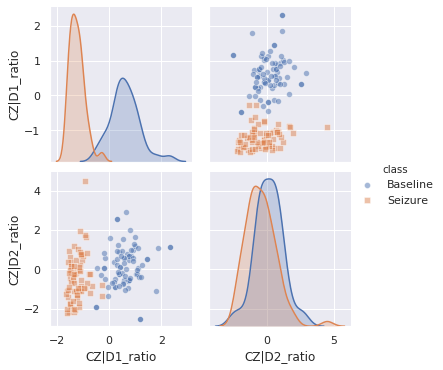

In [20]:
from sklearn.utils import resample
from collections import Counter

print(color.UNDERLINE + 'Before Resample' + color.END)
print(Counter(y_train))
plot_pairplot(reduced_df, y_train)

print(color.UNDERLINE + 'After Resample' + color.END)
data_x_downsampled, data_y_downsampled = resample(reduced_df[y_train == 0],
                                                  y_train[y_train == 0],
                                                  replace=True,
                                                  n_samples=reduced_df[y_train == 1].shape[0],
                                                  random_state=123)

data_x_bal = np.vstack((reduced_df[y_train == 1], data_x_downsampled))
data_y_bal = np.hstack((y_train[y_train == 1], data_y_downsampled))
print(Counter(data_y_bal))

plot_pairplot(pd.DataFrame(data_x_bal, columns = reduced_df.columns), 
              pd.DataFrame(data_y_bal))

**RandomUnderSampler**

RandomUnderSampler is part of the Imblearn package, which allows for a lot of techniques for working with imballanced data.

First we'll look at how you can do a random undersample with this package, which is just an easier version of what we have just done

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Before Resample
Counter({0: 164, 1: 79})


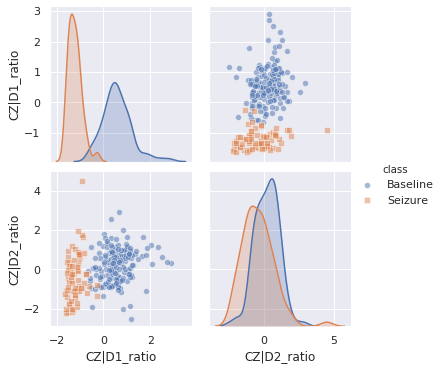

After Resample
Counter({0: 79, 1: 79})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


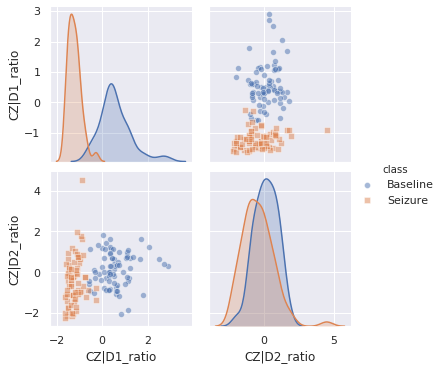

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def imblearn_sample(sampler, data_x, data_y):

    print(color.UNDERLINE + 'Before Resample' + color.END)
    print(Counter(data_y))
    plot_pairplot(data_x, data_y)

    print(color.UNDERLINE + 'After Resample' + color.END)
    data_x_downsampled, data_y_downsampled = sampler.fit_resample(data_x,
                                                                data_y)
    print(Counter(data_y_downsampled))

    plot_pairplot(pd.DataFrame(data_x_downsampled, columns = data_x.columns), 
                  pd.DataFrame(data_y_downsampled))
    
imblearn_sample(RandomUnderSampler(random_state=123), reduced_df, y_train)

**NearMiss**

A number of undersampling methods use heuristics based on k-nearest neighbors (KNN) classification<sup>1</sup>. KNN finds a number of samples that are the most similar to a data point we want to classify, based on a given distance metric, with its assigned class label depending on a majority vote by the nearest neighbours<sup>2</sup> (we'll come back to this later). NearMiss uses this by selecting samples in the class to be under-sampled where the average distance to the closest or farthest samples of the minority class is smallest<sup>3</sup>. 

---
1. Mani, I., & Zhang, I. (2003, August). kNN approach to unbalanced data distributions: a case study involving information extraction. In Proceedings of workshop on learning from imbalanced datasets (Vol. 126).
2. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
3. Lemaître, G., Nogueira, F., & Aridas, C. K. (2017). Imbalanced-learn: A python toolbox to tackle the curse of imbalanced datasets in machine learning. The Journal of Machine Learning Research, 18(1), 559-563.

Before Resample
Counter({0: 164, 1: 79})


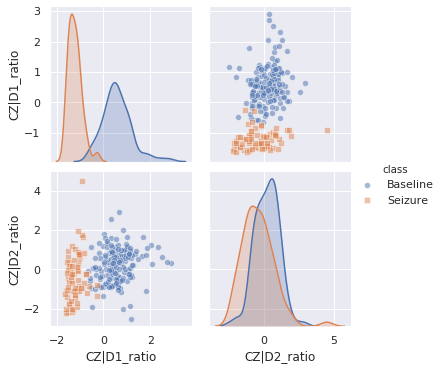

After Resample
Counter({0: 79, 1: 79})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


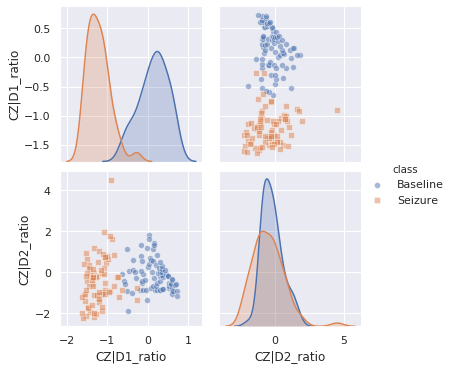

In [22]:
from imblearn.under_sampling import NearMiss

imblearn_sample(NearMiss(random_state=123), reduced_df, y_train)

**NeighbourhoodCleaningRule**

Undersampling techniques also include data cleaning rules, where the number of samples in classes are not specified, but data is edited based on methods such as removing data dissimilar to their neighbourhood<sup>1</sup> or by removing one or both samples in different classes when they are nearest neighbors of each other<sup>2</sup>.

---
1. Wilson, D. L. (1972). Asymptotic properties of nearest neighbor rules using edited data. IEEE Transactions on Systems, Man, and Cybernetics, (3), 408-421.
2. Tomek, I. (1976). Two modifications of CNN. IEEE Trans. Systems, Man and Cybernetics, 6, 769-772.

Before Resample
Counter({0: 164, 1: 79})


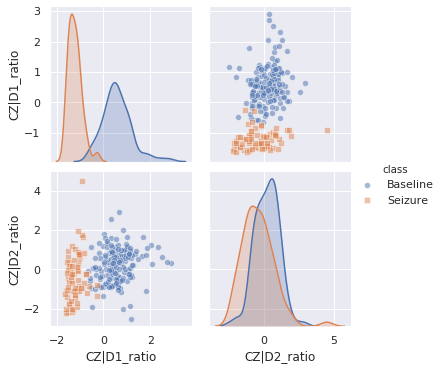

After Resample
Counter({0: 152, 1: 79})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

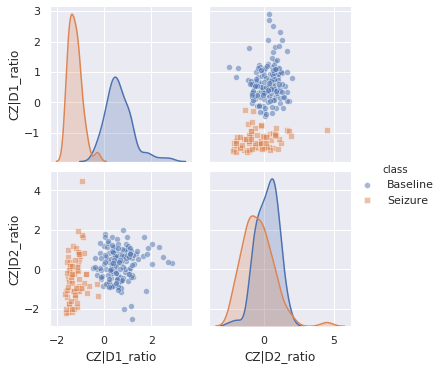

In [23]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

imblearn_sample(NeighbourhoodCleaningRule(random_state=123), reduced_df, y_train)

### Over-Sampling

**RandomOverSampler**

Data can be oversampled easily by randomly sampling from minority classes with replacement to duplicate original samples. 

**Notes**
- make sure to oversample after splitting the training and validation sets or you may "bleed" information into the validation sets of the model when trying to test a model (https://beckernick.github.io/oversampling-modeling/)

Before Resample
Counter({0: 164, 1: 79})


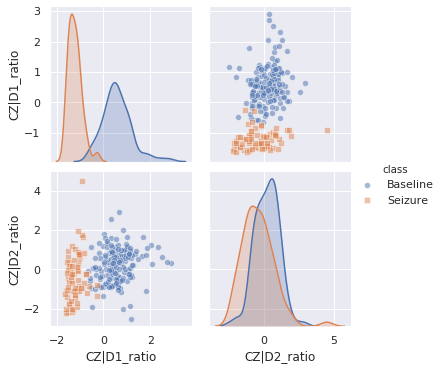

After Resample
Counter({0: 164, 1: 164})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


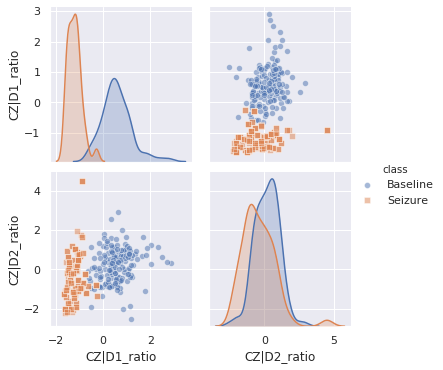

In [24]:
from imblearn.over_sampling import RandomOverSampler

imblearn_sample(RandomOverSampler(random_state=123), reduced_df, y_train)

**ADASYN and SMOTE**

Instead of just randomly oversampling there are also available approaches that generate new samples through the use of interpolation, such as SMOTE and ADASYN. However these methods can generate noisy samples so the previously discussed cleaning methods can be applied after oversampling<sup>1</sup>.

---
1. Batista, G. E., Prati, R. C., & Monard, M. C. (2004). A study of the behavior of several methods for balancing machine learning training data. ACM SIGKDD explorations newsletter, 6(1), 20-29.

SMOTE
Before Resample
Counter({0: 164, 1: 79})


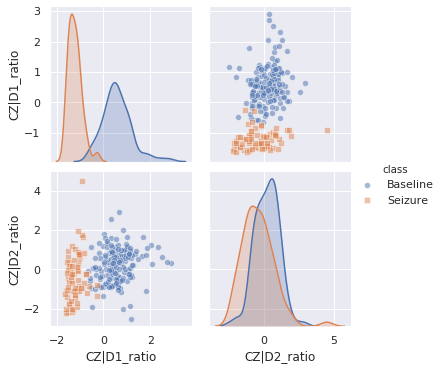

After Resample
Counter({0: 164, 1: 164})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


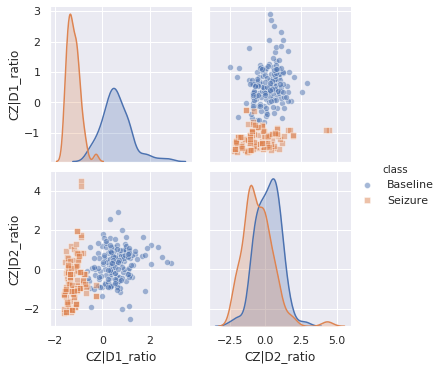

ADASYN
Before Resample
Counter({0: 164, 1: 79})


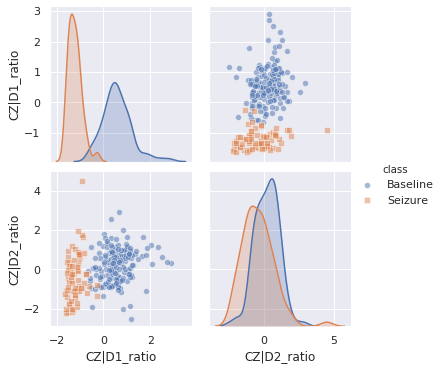

After Resample
Counter({0: 164, 1: 163})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


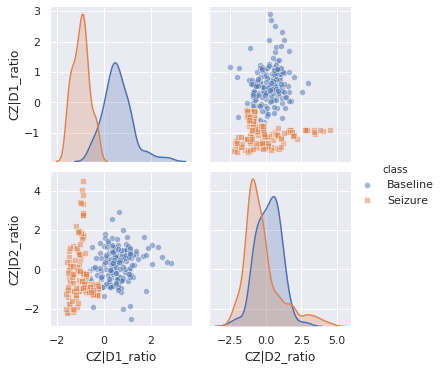

SMOTE with Edited Nearest Neighbor
Before Resample
Counter({0: 164, 1: 79})


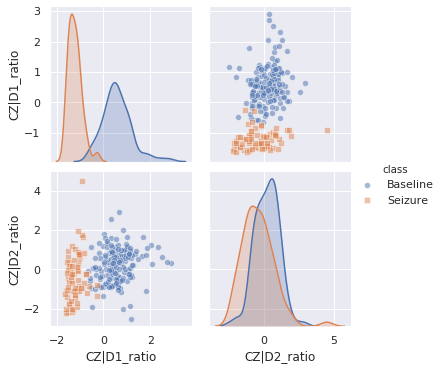

After Resample
Counter({1: 155, 0: 154})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

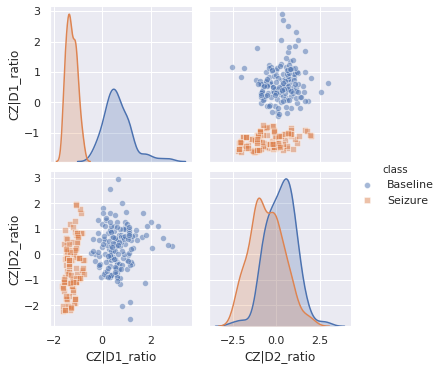

SMOTE with Tomek links
Before Resample
Counter({0: 164, 1: 79})


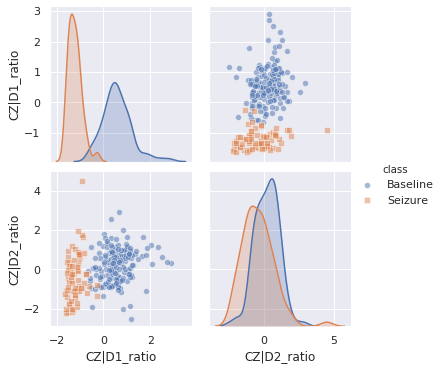

After Resample
Counter({0: 164, 1: 164})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


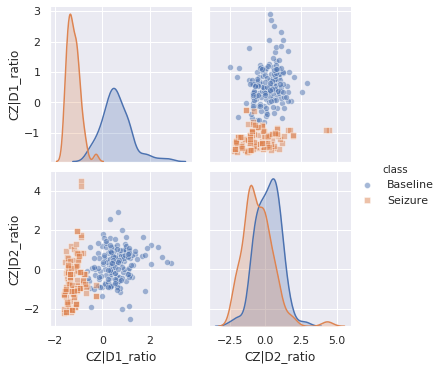

In [25]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

print(color.BOLD+color.UNDERLINE+'SMOTE'+color.END)
imblearn_sample(SMOTE(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'ADASYN'+color.END)
imblearn_sample(ADASYN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Edited Nearest Neighbor'+color.END)
imblearn_sample(SMOTEENN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Tomek links'+color.END)
imblearn_sample(SMOTETomek(random_state=123), reduced_df, y_train)

# Binary Classification
**TODO**
- Insert a written introduction to section

## Logistic Regression

Logistic regression is a linear model for classification of a dependent variable which has a limited number of possible values. Logistic regression is a probabilistic model, using an odds ratio to determine the probability of the categorisation of an event<sup>1</sup>. In binary classification, if the estimated probability is greater than 50% then the instance is predicted to be the positive class (e.g. ictal), otherwise the negative class is predicted (e.g. inter-ictal)<sup>2</sup>.

Lets first see how we would fit a Logistic Regression model to our data

**Notes**
- This is not to be confused with linear regression where the dependent variable is continuous. 

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

In [26]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=100., 
                         solver='liblinear',
                         random_state=RANDOM_STATE)

reg.fit(X_train_scale, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

As has been previously mentioned, logistic regression is a discriminative algorithm, therefore it models the boundaries separating labels. To demonstrate this separation lets look at the desision regions from two features, D1_Ratio and D2_Ratio. First lets plot it out without a separation boundary.

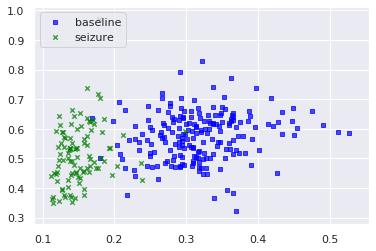

In [27]:
from mlxtend.plotting import category_scatter

x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class', 
                       data=feature_reduced, legend_loc='upper left')

feature_list = list(feature_reduced_drop.columns)
vis_data = X_train_scale[:,[feature_list.index(x_axis_label),
                          feature_list.index(y_axis_label)]]

As can be seen from the resulting plot, this particular combination of features (with one or two exceptions) quite nicely allows for the linear separation of baseline (0) and seizure (1) data

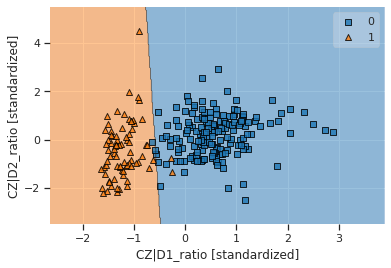

In [28]:
from mlxtend.plotting import plot_decision_regions

reg.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = reg)

plt.xlabel(x_axis_label + ' [standardized]') 
plt.ylabel(y_axis_label + ' [standardized]')
plt.show()

You may have noticed we specified the parameter C when creating the Logistic Regression classifier. This can be used to address the problem of overfitting to the training data as increasing the value of C decreases the strength of the regularization on the model. Lets have a quick look what changes to C looks like in our linear decision boundary.

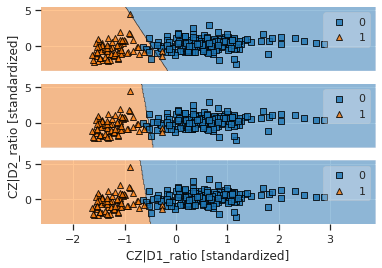

In [29]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)

for i, c in enumerate([0.1, 1, 10]):
    reg = LogisticRegression(C=c, solver='liblinear',random_state=RANDOM_STATE)

    reg.fit(vis_data, y_train)

    plot_decision_regions(vis_data,
                          y_train,
                          clf = reg,
                          ax = axes[i])
    axes[i].get_xaxis().set_visible(False)

axes[2].get_xaxis().set_visible(True)
plt.xlabel(x_axis_label + ' [standardized]') 
axes[1].set_ylabel(y_axis_label + ' [standardized]')
plt.savefig('log_change_reg.png')
plt.show()

So far we have been completing each step individually, but we can use pipelines to tie steps together. This is especially useful as pipeline steps become more complex.

Lets first make a model where we scale our data and then put it into our logistic regression classifier

In [30]:
from sklearn.pipeline import Pipeline

pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(C=100, 
                                                solver='liblinear',
                                                class_weight='balanced',
                                                random_state=RANDOM_STATE))])

pipe_reg

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=100, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Notice this time we set class_weight = 'balanced'. Above we have discussed class ballancing using the imblearn package to resample, but you can also do it at the classification step in sklearn. 

Machine learning algorithms typically optimize a reward or cost function using the sum of the training examples when fitted. Therefore the descision boundary is going to be bias towards the majority class as the opimizations are based on the predictions which is inevitability affected if it has to predict one class more than another. The easiest way to do this in sklearn is just to assign a larger penalty to wrong predictions on the minority class using the class_weight parameter<sup>1</sup>.

Now we will retrain the model on the full data again and see how accurately it predicts the validation set which it hasn't been trained on.

Accuracy is a simple evaluative measure as it just gives the number of correct or false predictions comparative to the total number of prediction. We will just use this for now as we will go over other model assessments in the next tutorial.

**NOTE**
- *Score()* applys the transforms to the data, and scores with the final estimator

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

In [31]:
pipe_reg.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_reg.score(X_val, y_val))

Validation Accuracy: 0.963


Pretty good but we've missclassified a few. First lets get an array of the predicted classes.

**NOTE**
- *Predict()* applys the transforms to the data, and predicts with the final estimator in a pipeline

In [32]:
log_predicted = pipe_reg.predict(X_val)
log_predicted

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1])

As you can see its similar to the validation data, with one or two exceptions.

In [33]:
y_val

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1])

In the next notebook we will look at how to evaluate the model performance using some useful metrics beyond accuracy (which as you will find out is not the best metric for seizure detection!). However, for now, lets move onto another model.

## Support Vector Machine (SVM)

Support Vector Machines (SVM) are another common discriminative algorithm, well suited to complex small- to medium sized datasets<sup>1</sup>, which aim to find a hyperplane that provides the maximum margin of separation between classes of objects. A subset of training data, known as support vectors, are selected by an algorithm to compute the optimal separation hyperplane between classes. If data can be linearly separated, then a 'hard margin' of separation can be used; whereby a point on the edge of a class is used as the support vector for the decision boundary. However this method is sensitive to outliers, so a more flexible method may be preferable, using a soft margin of separation to compute a hyperplane that still provides a maximum margin of separation, whilst still allowing for some errors. In Scikit-Learn's SVM class this can be controlled by the C hyperparameter; with a smaller C creating a wider boundary but with more margin violations. A hyperplane does not need to be linear as the input feature space can be projected to higher dimensions using a radial basis kernel<sup>2,3</sup>, allowing a hyperplane to be fitted to split the data into classes. The data can then be mapped back into the original feature space to create a nonlinear separation boundary.

There are three classes for SVM classification in Scikit-Learn (table below adapted from Géron(2017)<sup>1</sup>):

| Class                | Time Complexity                                                                      | Out-of-core Support | Kernel Trick|
|------------------------|-------------------------------------------------------------------------------------------|---------------------------------|--------------------|
| LinearSVC       | 0(*m* x *n*)                                                                               | No                               | No                |
| SGDClassifier | 0(*m* x *n*)                                                                               | Yes                              | No                |
| SVC                  | 0(*m*<sup>2</sup> x *n*) to 0(*m*<sup>3</sup> x *n*) | No                               | Yes               |

First lets make a pipeline with two steps:

1. Standardize the features
2. SVM

For the SVM we'll just use the SVC and set the kernel to linear so we can compare the decision boundary to the logistic regression as we did before. The data is quite small so using SVC, although takes longer than the other two methods, is fine for this dataset.

---

1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. Cover, T. M. (1965). Geometrical and statistical properties of systems of linear inequalities with applications in pattern recognition. IEEE transactions on electronic computers, (3), 326-334.
3. Varsavsky, A., Mareels, I., & Cook, M. (2016). Epileptic seizures and the EEG: measurement, models, detection and prediction. CRC Press.

In [34]:
from sklearn.svm import SVC

pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(C=100,
                                        kernel='linear',
                                        class_weight = 'balanced', 
                                        random_state=RANDOM_STATE))])

pipe_svc_linear

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=100, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=0, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

If we plot out the decision regions we'll see its quite similar to the logisitic regression. 

First we'll change the visualisation data to work on the non-scaled data as we now scale in our pipeline.

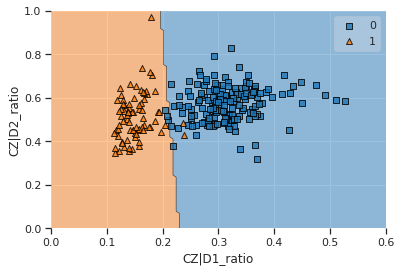

In [35]:
from mlxtend.plotting import plot_decision_regions

vis_data = X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

pipe_svc_linear.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_linear)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_linear_boundary.png')
plt.show()

However if we change the kernel to a radial basis function this creates a non-linear decision boundary.

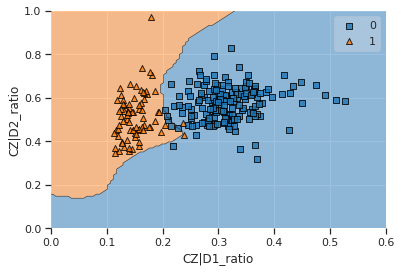

In [36]:
pipe_svc_rbf = Pipeline([('scl', StandardScaler()),
                         ('clf', SVC(C=100,
                                     kernel='rbf',
                                     class_weight = 'balanced', 
                                     random_state=RANDOM_STATE))])

pipe_svc_rbf.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_rbf)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_rbf_boundary.png')
plt.show()

As we can see the new non-linear boundary has actually improved the accuracy from our previous model on the validation set.

**NOTE**
- we are using small amounts of data here so 100% accuracy on the validation set does not neccissarily mean this model will generalise well to other data.

In [37]:
pipe_svc_rbf.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_svc_rbf.score(X_val, y_val))

Validation Accuracy: 1.000


## Decision Tree

A decision tree breaks data down by asking a series of questions in order to categorise samples into the same class. An algorithm starts at a tree root and then splits the data based on the features that gives the largest information gain. This splitting procedure occours until all the samples within a given node all belong to the same class. A limit on nodes, or tree depth, is often set to avoid overfitting due to a deep tree. To split using information gain relies on calculating the difference between an impurity measure of a parent node and the sum of the impurities of its child nodes; information gain being high when impurity of the child nodes is low. Three impurity measures that are commonly used in binary decision trees are gini impurity, entropy, and the classification error. An ensemble of decision trees can be created to build a more robust model by giving each tree a random bootstrap sample of the data and using a majority voting rule to predict class label<sup>1</sup>. 

Lets start by building a tree with one split.

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = 1,
                            random_state=RANDOM_STATE)

DT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Lets have a look at our dataset with two feature and one split.

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to produce binary trees, meaning nodes always have two children. Other algorithms, such as ID3, can have more children. The algorithms spits the training set into two subsets using a single feature and a theshold searching for the pair that produces the 'purest' subset based on size, minimising a cost function. Once split, it uses the same logic recursively until the maximum depth is reached or a split cannot be found that reduces impurity<sup>1</sup>. 

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

In [39]:
!pip install graphviz

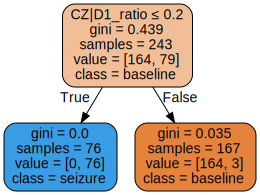

In [40]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import graphviz

DT.fit(vis_data, y_train)
dot_data = export_graphviz(DT, out_file=None, 
                     feature_names=[x_axis_label, y_axis_label],  
                     class_names=feature_reduced['class'].unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('binary_split.png')

# Show it
graphviz.Source(dot_data)

As we can see above it has chosen a value at which to split the data up. If below or equal to 0.2 it is classed as seizure and above is baseline.

If we then look at the descision boundary we see this is just a straight line representing this split

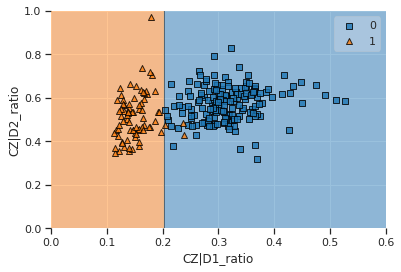

In [41]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

Lets now not restrict the number of splits it uses.

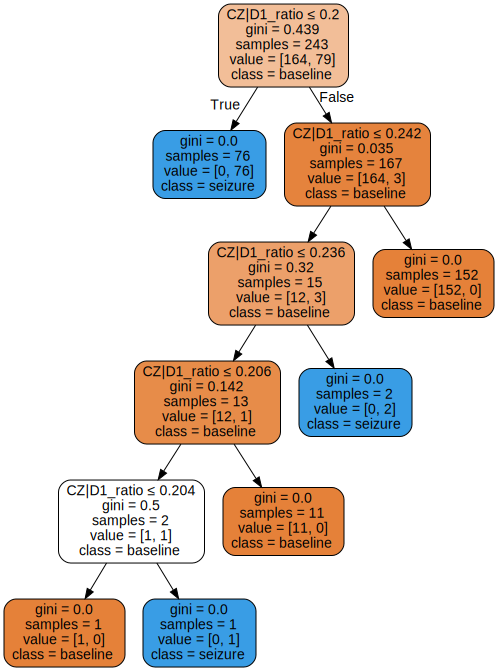

In [42]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(vis_data, y_train)

dot_data = export_graphviz(DT, out_file=None, 
                     feature_names=[x_axis_label, y_axis_label],  
                     class_names=feature_reduced['class'].unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('multi_split.png')

# Show it
graphviz.Source(dot_data)

As can be seen by the descision boundary, a decision tree is quite boxy. Furthermore, how the model makes a decision boundary is going to be affected by the rotation of the data (as DTs create straight lines).

In this case, it appears to be overfitting to the training data; see the thin orange line in the blue, this likely wouldnt help in the future.

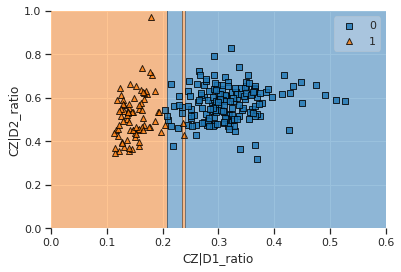

In [43]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

Lets now fit it on the full training data and see what features it uses to split the data. Decision trees are useful as they allow us assess the importance of each feature to classify the data. 

**NOTE**
- In a later tutorial we will look at how we can use feature importances as a dimensionality reduction method.

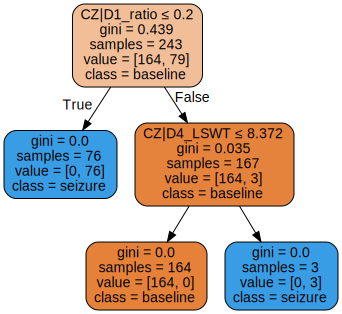

In [44]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(X_train, y_train)

dot_data = export_graphviz(DT, out_file=None, 
                     feature_names=feature_reduced_drop.columns,  
                     class_names=feature_reduced['class'].unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  

graphviz.Source(dot_data)

When we test the accuracy it becomes slightly worse than the support vector machine, but as we saw this could be due to overfitting to the training data. We will use methods in later tutorials to test for this!

In [45]:
print('Validation Accuracy: %.3f' % DT.score(X_val, y_val))

Validation Accuracy: 0.926


### Extra Tree

An extratree is similar to a tree classifier except it more randomized and thusly produces more complex trees. An extratree tests a random number of splits rather than all splits. As we can see how just one tree looks, this is a very complex model!

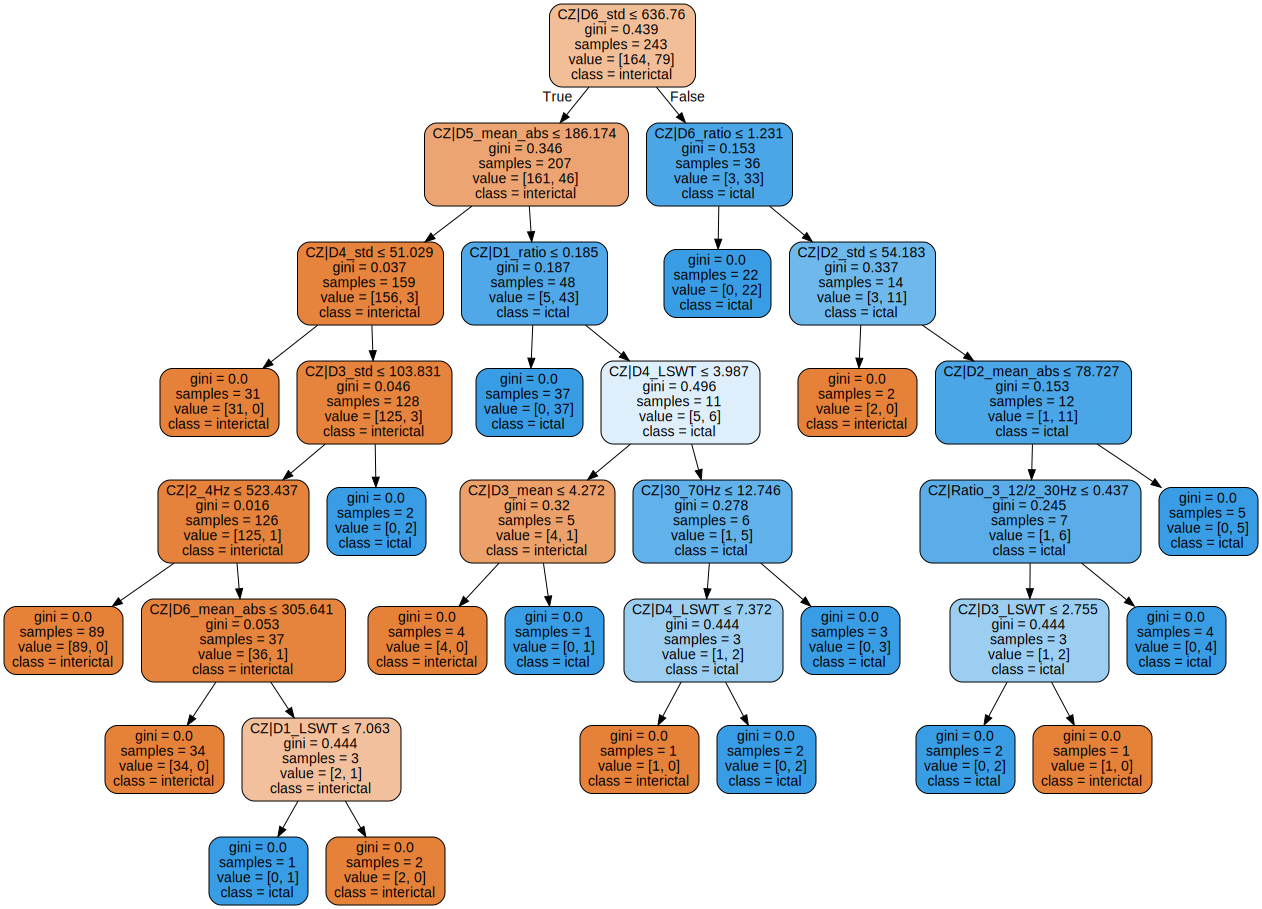

In [46]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

tree = ExtraTreeClassifier(criterion='gini',
                              random_state=RANDOM_STATE,
                              max_depth = None,
                              max_features='auto')

tree.fit(X_train, y_train)
dot_data = export_graphviz(tree, out_file=None, 
                     feature_names=list(feature_reduced_drop.columns),  
                     class_names=['interictal', 'ictal'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graphviz.Source(dot_data)

## K-Nearest Neighbors

KNN finds a number of samples that are the most similar to a data point we want to classify, based on a given distance metric, with its assigned class label depending on a majority vote by the nearest neighbours<sup>1</sup>. KNN is classed as a lazy learner as is memorizes the training data rather than learning a discriminative function<sup>1</sup>. The number of *k* and a distance metric need to be specified (often the Euclidean distance with real valued data; the default in sklearn), with the algorithm using these to classify a sample and assigning it a label by majority vote using the *k* samples in the training set that are the most similar to the point we want to sample<sup>1</sup>.

The classifier can be easily adapted as new data becomes available, however classification complexity linearly increases with the number of data in the training set; unless data structures such as KD-Trees are used<sup>1,2</sup>. Furthermore, KNN is susceptible to overfitting due to the curse of dimensionality, where the feature space becomes more sparse as the number of dimensions of the feature space increases<sup>1</sup>. This is where dimensionality reduction techniques can help (see later tutorial).

---
1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
2. Friedman, J. H., Bentley, J. L., & Finkel, R. A. (1976). An algorithm for finding best matches in logarithmic time. ACM Trans. Math. Software, 3(SLAC-PUB-1549-REV. 2), 209-226.

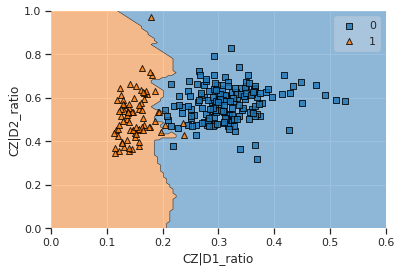

In [47]:
from sklearn.neighbors import KNeighborsClassifier
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=2))])

pipe_knn.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_knn)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

In [48]:
pipe_knn.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_knn.score(X_val, y_val))

Validation Accuracy: 0.889


# Multiclass Classification

Tree-based classifiers are inherently multiclass whereas other machine learning algorithms are able to be extended to multi-class classification using techniques such as the One-versus-Rest or One-versus-One methods<sup>1</sup>.

Before we finish this tutorial lets see how well we can classify the different electrode locations (intracranial epileptogenic zone, surface, intracranial hippocampus).

---
1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

In [ ]:
multi_data_x = feature_df.drop(['class','file_id', 'location'], 
                         axis='columns').values

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
multi_data_y = le.fit_transform(feature_df['location'])
    
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_data_x, 
                                                    multi_data_y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)

multi_X_train, multi_X_val, multi_y_train, multi_y_val = train_test_split(multi_X_train, 
                                                  multi_y_train, 
                                                  test_size=TEST_SIZE, 
                                                  random_state=RANDOM_STATE)

The decision tree assigns probabilities to the class membership for each of the classes, as demonstrated below using the first 5 data examples 

In [50]:
multi_DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
multi_DT.fit(multi_X_train, multi_y_train)

multi_DT.predict_proba(multi_X_val[:5,:])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

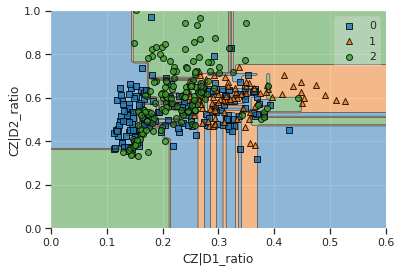

In [51]:
multi_vis_data = multi_X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

multi_DT.fit(multi_vis_data, multi_y_train)

plot_decision_regions(multi_vis_data,
                      multi_y_train,
                      clf = multi_DT)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

Now lets have a look at how we can use the OneVsRestClassifier to extend a binary support vector machine to be used for multi-class classification.

One-vs-the-rest (or one-verses-all) is were you train a classifier for each class and select the class from the classifier that outputs the highest score<sup>1</sup>. As each class is fitted against all other classes for each classifier, it is relatively interpretable<sup>2</sup>.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

In [52]:
from sklearn.multiclass import OneVsRestClassifier

multi_pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsRestClassifier(SVC(C=100,
                                    kernel='rbf',
                                    gamma = 'auto',
                                    class_weight = 'balanced',
                                    random_state=RANDOM_STATE)))])

multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

Validation Accuracy: 0.867


Another strategy is to use a OneVsOneClassifer. This trains $N \times (N-1) / 2$ classifiers by comparing each class against each other so when a prediction is made, the class that is selected the most is chosen<sup>1</sup>. It is useful where algorithms do not scale well with data size (such as SVM) because each training and prediction is only needed to be run on a small subset of the data for each classifer<sup>1,2</sup>.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html


In [53]:
from sklearn.multiclass import OneVsOneClassifier

multi_pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsOneClassifier(SVC(C=100,
                                   kernel='rbf',
                                   gamma = 'auto',
                                   class_weight = 'balanced',
                                   random_state=RANDOM_STATE)))])

multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

Validation Accuracy: 0.867


Lets finally plot the decision regions as before, which now has three areas

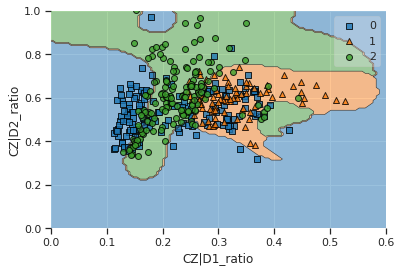

In [54]:
multi_pipe_svc_rbf.fit(multi_vis_data, multi_y_train)

plot_decision_regions(multi_vis_data,
                      multi_y_train,
                      clf = multi_pipe_svc_rbf)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

# Exercises

Below are a few suggested exercises that may help improve your skills.

1. Implement a support vector machine using the different algorithms available 
2. Change the hyperparameters of the DecisionTreeClassifier to improve the accuracy
3. once you have a model configurations you are happy with, see how well they do on the test set. Remember, you should only run each model on the test set once to prevent overfitting!

**TODO**
- add in some more exercises

# Extra
Generally I try to make sure the code in these tutorials are as quick as possible to run through. However sometimes there are extra bits that maybe take a bit longer to run but I still wanted to include. Same goes for if the bit of code breaks the flow of the tutorial. Enter the extra section where you will find these bits of code below :)

## Plot Missclassified

This is in the extra section as it requires you to download the origional data as well. For this dataset that is very quick so should not be an issue, however in later tutorials as the data gets bigger this will take longer.

To plot the data that were misclassified from models we'll need to know the file_id's of those files that were wrongly labeled. We did not split the data as a dataframe with these file_id's in so we'll just redo the train_test_split but just with the file_id's instead of our feature data.

We'll just check our new splits are the same; they should be because we used the same random state and test_size so the splits should be in the same place.

In [55]:
X_train_id, X_test_id, y_train_id, y_test_id = train_test_split(feature_reduced['file_id'], 
                                                                data_y, 
                                                                test_size=TEST_SIZE, 
                                                                random_state=RANDOM_STATE)

X_train_id, X_val_id, y_train_id, y_val_id = train_test_split(X_train_id,
                                                              y_train_id, 
                                                              test_size=TEST_SIZE, 
                                                              random_state=RANDOM_STATE)

print('The validation classes are the same: ' + str(np.array_equal(y_val, y_val_id)))

print(color.BOLD+color.UNDERLINE+"\nValidation ID's"+color.END)
X_val_id.head()

The validation classes are the same: True

Validation ID's


325    S026
135    N036
385    S086
98     F099
345    S046
Name: file_id, dtype: object

**NOTES**
- If you want to understand the following a bit better then have a look at the Epileptologie feature extraction notebook but don't worry about this too much

In [56]:
!pip install beautifulsoup4 requests wget

In [57]:
import sys
import os
from bs4 import BeautifulSoup
import requests
import re
import wget
import zipfile
import glob
import pprint
import re

DOWNLOAD_DIR = "Epileptologie Database"


def find_files(url):
    # get a soup of the directory url
    soup = BeautifulSoup(requests.get(url).text, features="html.parser")

    # make a list of all the links in the url
    hrefs_list = []
    for link in soup.find_all('a'):
        hrefs_list.append(link.get('href'))

    return hrefs_list
    
    
def download_file(download_file_url, file_dir, output=False):
    if output:
        # print it is downloading
        print('Downloading: '+ download_file_url)
    # download the file to the directory
    wget.download(download_file_url, file_dir)
    
    
# needs a directory to download it to
def download_epileptologie(DIR, output=False):
    
    # directory url
    front_url = 'http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3&changelang=3'
    dir_url = 'http://epileptologie-bonn.de/cms'

    hrefs_dir_list = find_files(front_url)
    
    # for each link in the directory
    for link in hrefs_dir_list:
        # download the files outside of participant folders we want
        if re.findall('zip', str(link)):
            # if the file doesnt already exist in the directory
            if not os.path.exists(os.path.join(DIR, link)):
                download_file(dir_url+'/'+str(link), DIR, output)
                zip_file_name = link.split('/')[-1]
                zip_ref = zipfile.ZipFile(os.path.join(DIR, zip_file_name), 'r')
                zip_ref.extractall(os.path.join(DIR, zip_file_name[0]))
                zip_ref.close()
                os.remove(os.path.join(DIR, zip_file_name))
                
                
def file_list(folder_path, output=False):
  pp = pprint.PrettyPrinter()
  # create an empty list
  file_list = []
  # for file name in the folder path...
  for filename in glob.glob(folder_path):
      # ... append it to the list
      file_list.append(filename)

  # sort alphabetically
  file_list.sort()

  # Output
  if output:
      print(str(len(file_list)) + " files found")
      pp.pprint(file_list)

  return file_list
                

if not os.path.exists(DOWNLOAD_DIR):
  os.makedirs(DOWNLOAD_DIR)
  
download_epileptologie(DOWNLOAD_DIR, output=False)

# get folder lists
dir_file_list = file_list(os.path.join(DOWNLOAD_DIR, '*'), output=True)

5 files found
['Epileptologie Database/F',
 'Epileptologie Database/N',
 'Epileptologie Database/O',
 'Epileptologie Database/S',
 'Epileptologie Database/Z']


Now we will plot out the missclassified samples. 

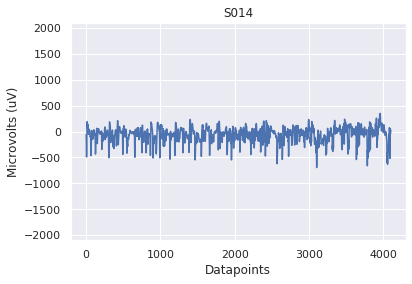

In [58]:
import pathlib

# reset the index so it goes from 0 to n-1
X_val_id = X_val_id.reset_index(drop=True)

def plot_missclassified(predicted, data_y, data_x):

  for index, class_no in enumerate(predicted):
      if class_no != data_y[index]:
          # filepath
          try:
            file_path = os.path.join(DOWNLOAD_DIR,
                                     data_x[index][0], # get letter for folder 
                                     data_x[index]+'.txt')
            # read in the datafile
            data = pd.read_csv(file_path,     # file in
                               header=None,   # no column names at top of file
                               dtype=float)   # read data as 'floating points' (e.g. 1.0)
          
          # sometimes the file extension is .TXT
          except FileNotFoundError:
            file_path = os.path.join(DOWNLOAD_DIR,
                                     data_x[index][0],
                                     data_x[index]+'.TXT')

            # read in the datafile
            data = pd.read_csv(file_path,
                               header=None,
                               dtype=float)

          plt.plot(data)
          plt.title(data_x[index])
          # plot all of them on the same scale
          plt.ylim(bottom = -2100, top=2100)
          plt.xlabel('Datapoints')
          plt.ylabel('Microvolts (uV)')
          plt.show()
            
plot_missclassified(pipe_reg.predict(X_val), 
                    y_val, X_val_id)

Lets use the same method as before to identify misclassified samples in the other models.

**NOTE**
- SVM didnt get any wrong thats why it is empty

In [ ]:
plot_missclassified(pipe_svc_rbf.predict(X_val), 
                    y_val, X_val_id)

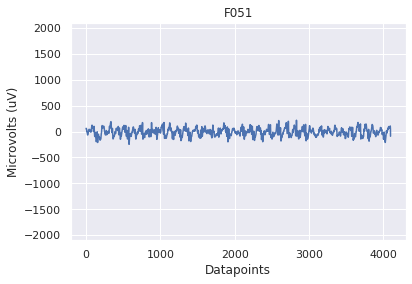

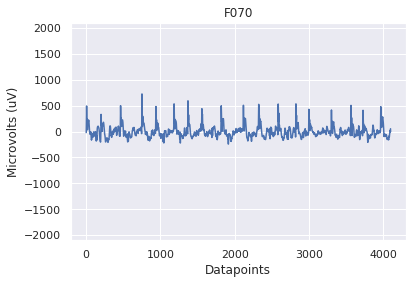

In [60]:
plot_missclassified(DT.predict(X_val), 
                    y_val, X_val_id)

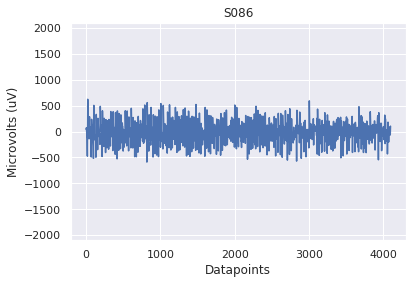

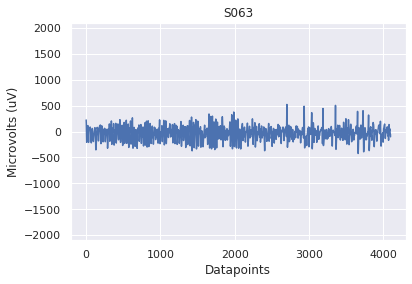

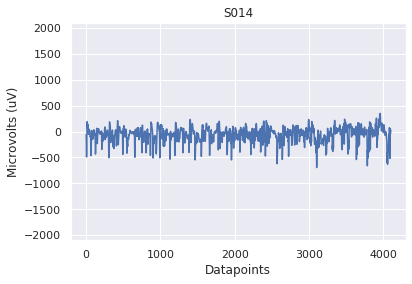

In [61]:
plot_missclassified(pipe_knn.predict(X_val), 
                    y_val, X_val_id)

## Plot All Features

This is in the extra section as it can take a while to make this graph (there are a lot of features and channels afterall).

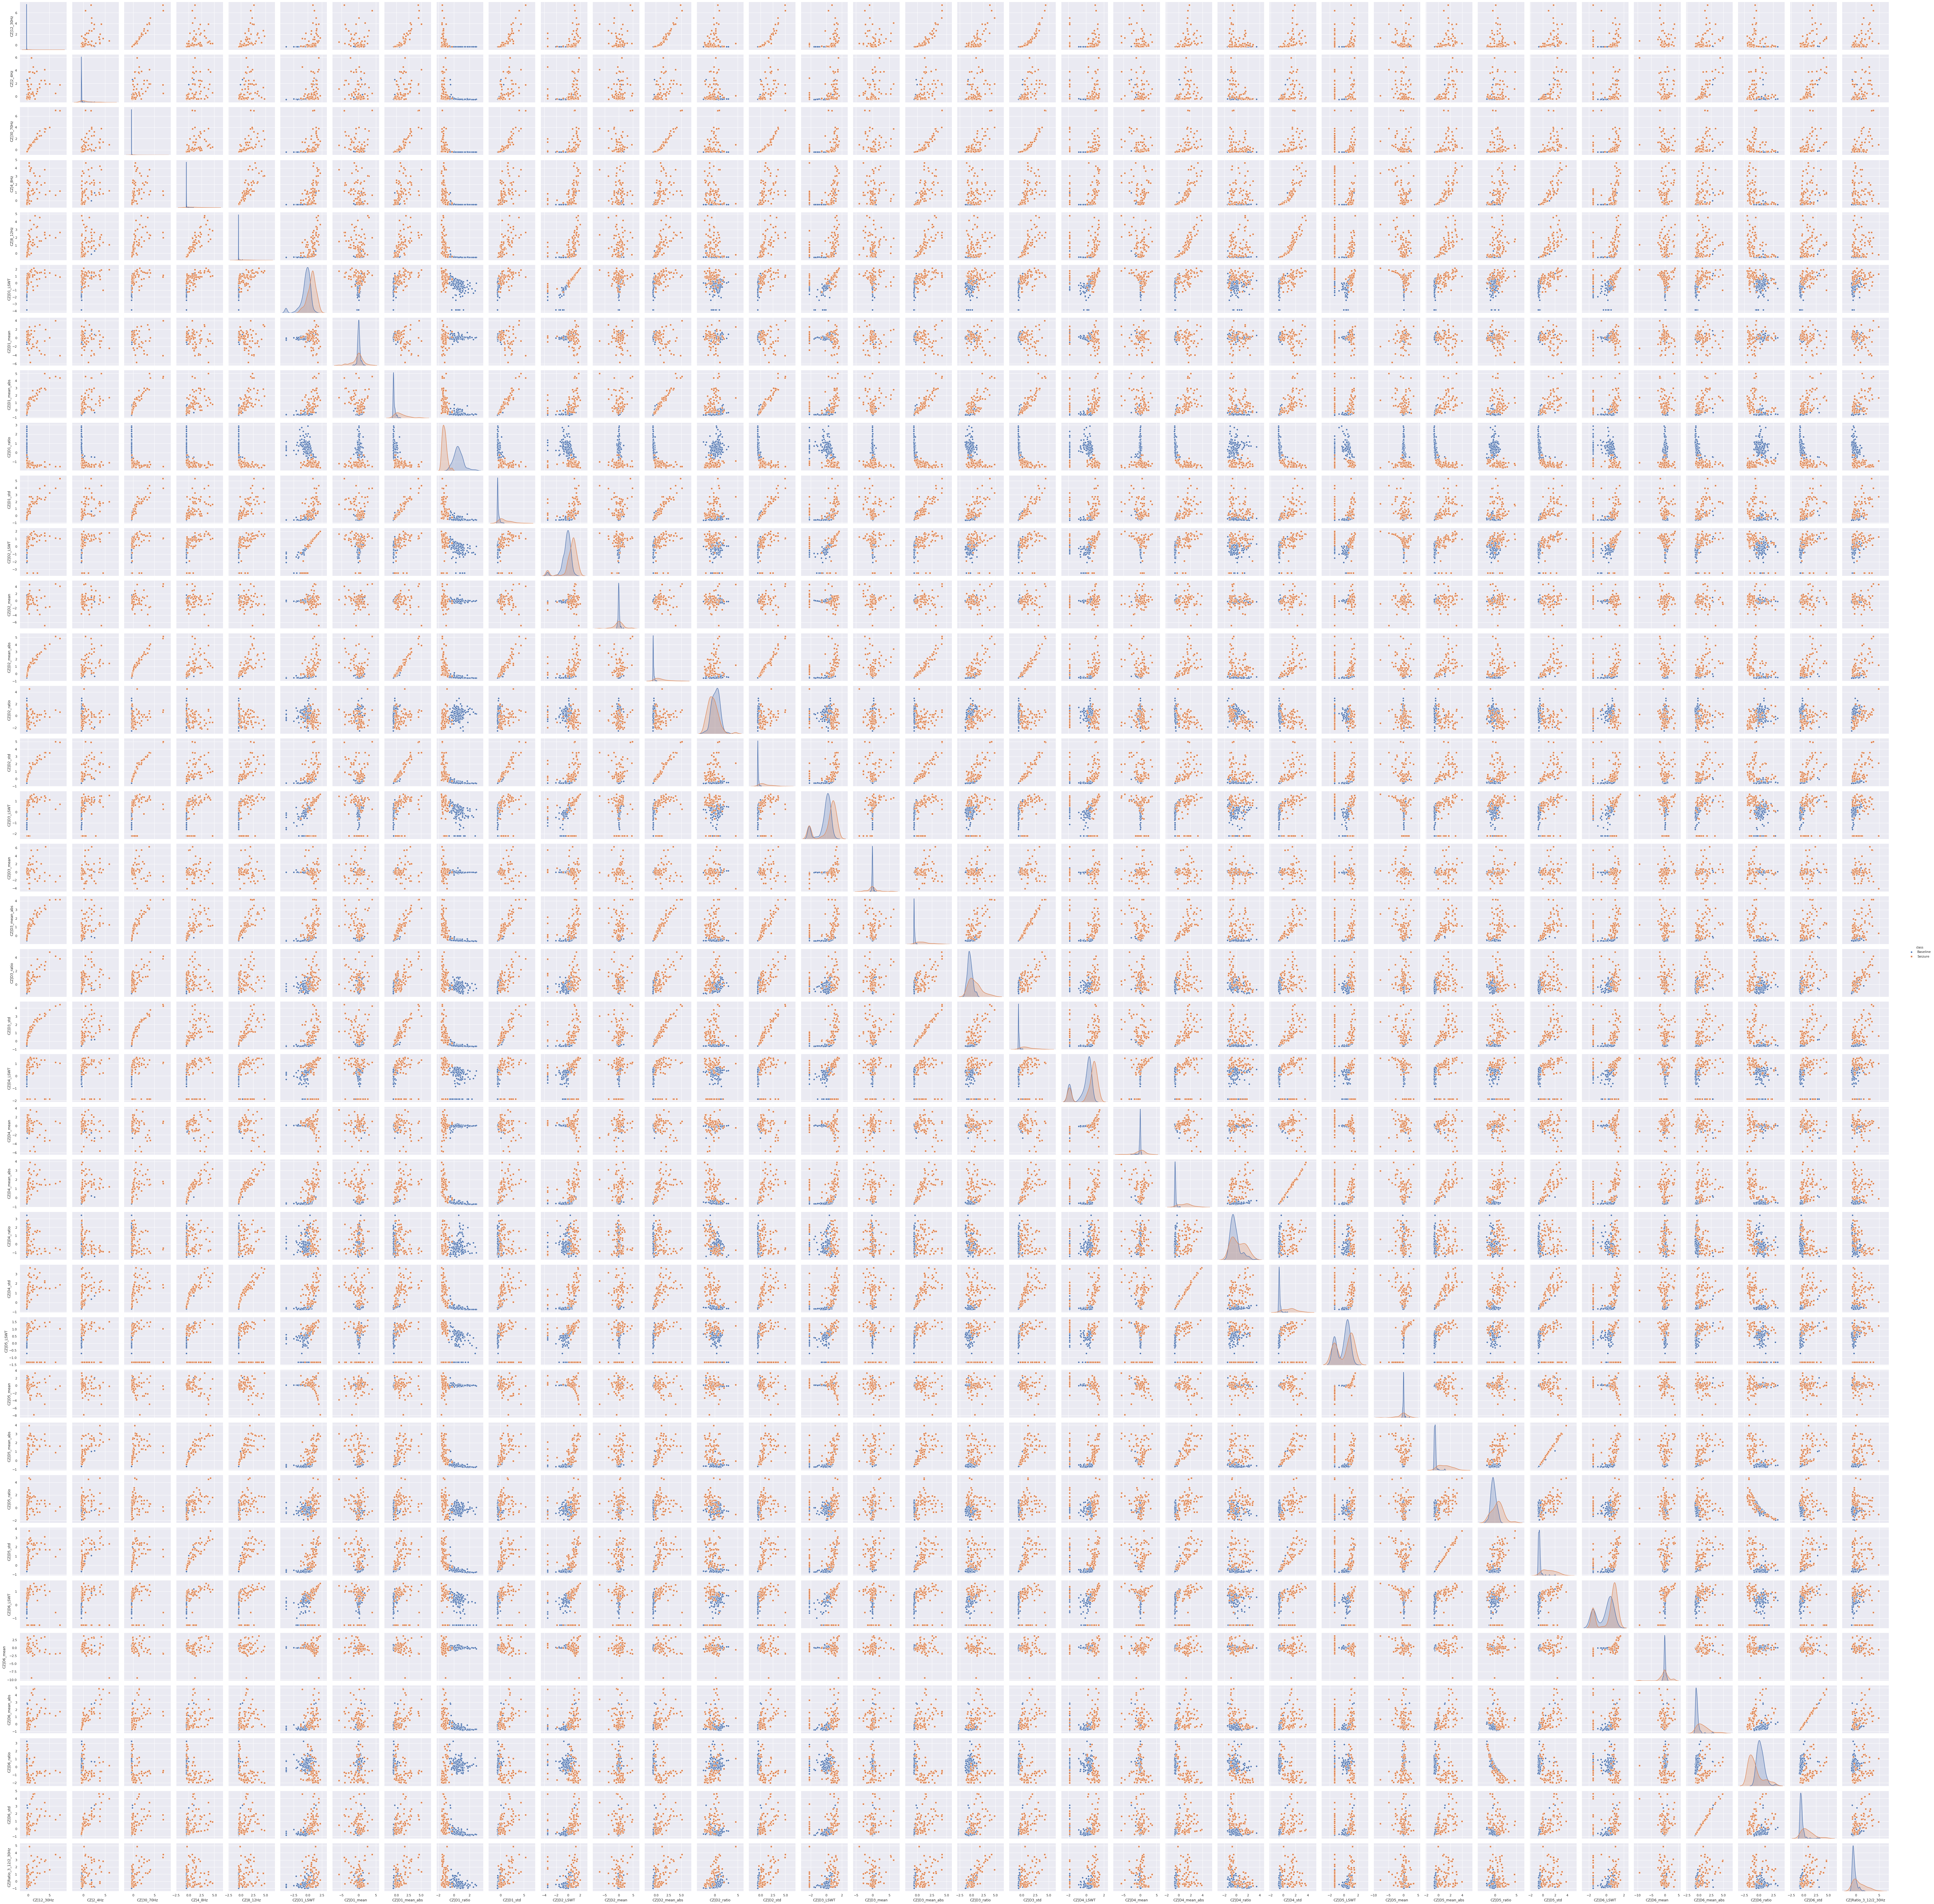

CPU times: user 11min 5s, sys: 1min 52s, total: 12min 58s
Wall time: 10min 47s


In [62]:
%%time
from IPython.display import Image

SCATTER_PLOT_PATH = 'tutorial_scatterplot_matrix.png'

# make a dataframe out of the sclaed training set
plot_data = pd.DataFrame(X_train_scale, columns = feature_reduced_drop.columns)
# make a class column the training clas set which has changed from integers to strings
plot_data['class'] = np.vectorize({0:'Baseline', 1:'Seizure'}.get)(y_train)
# plot each feature against each other with the classes used to separate out data
sns.pairplot(plot_data, height =2.5, hue = 'class', markers=["o", "s"])
plt.savefig(SCATTER_PLOT_PATH, dpi=300)
plt.show()

# License

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.